# Inversão do Te  do Havaí

In [2]:
from __future__ import division, print_function
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
x, topo = np.loadtxt('../DiaDois/Flexura/Oahu_profile.txt', unpack=True)

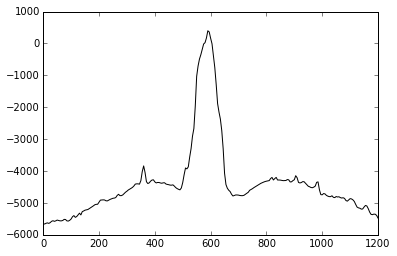

In [5]:
plt.plot(x, topo, '-k')

## Desafio: Estimar o regional com uma parábola

In [6]:
from fatiando.inversion import Misfit

In [18]:
class Parabola(Misfit):
    
    def __init__(self, x, y):
        super(Parabola, self).__init__(data=y, nparams=3, islinear=True)
        self.x = x
        
    def predicted(self, p):
        a, b, c = p
        return a*self.x**2 + b*self.x + c
    
    def jacobian(self, p):
        A = np.empty((self.ndata, self.nparams))
        A[:, 0] = self.x**2
        A[:, 1] = self.x
        A[:, 2] = 1
        return A

In [19]:
par = Parabola(x, topo).fit()

In [20]:
par.estimate_

array([ -6.73787189e-03,   8.42348926e+00,  -6.19822821e+03])

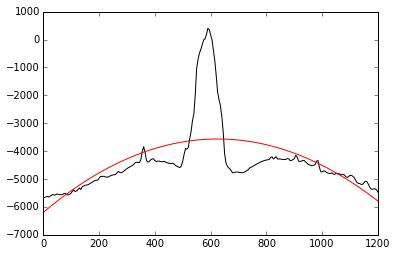

In [21]:
plt.plot(x, topo, '-k')
plt.plot(x, par.predicted(), '-r')

## Ajuste robusto

In [86]:
par_robusto = Parabola(x, topo).fit()

In [87]:
r = par_robusto.residuals()

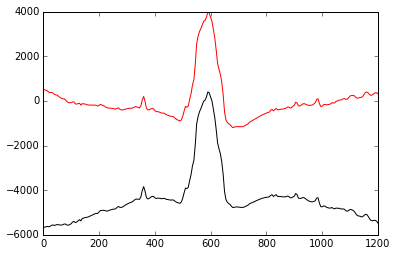

In [88]:
plt.plot(x, topo, '-k')
plt.plot(x, r, '-r')

In [89]:
pesos = 1/np.abs(r)
pesos[r < 1e-5] = 1e5

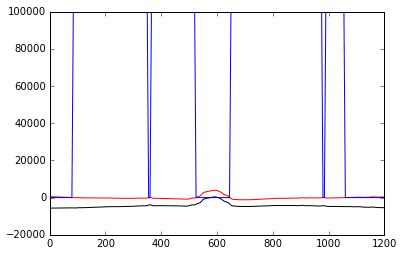

In [90]:
plt.plot(x, topo, '-k')
plt.plot(x, r, '-r')
plt.plot(x, pesos, '-b')

In [91]:
for i in xrange(20):
    r = par_robusto.residuals()
    pesos = 1/np.abs(r)
    pesos[np.abs(r) < 1e-5] = 1e5
    par_robusto.set_weights(pesos).fit()

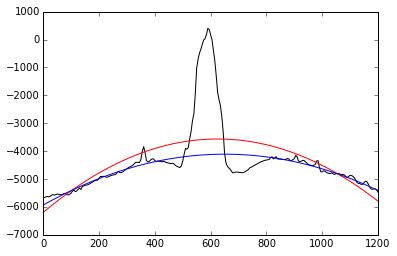

In [92]:
plt.plot(x, topo, '-k')
plt.plot(x, par.predicted(), '-r')
plt.plot(x, par_robusto.predicted(), '-b')